# EDA

# 1. Question Definition

## Question - > 

## Reading the data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn import metrics

In [2]:
df = pd.read_csv('/Users/RyanMburu/Documents/Supervised-Learning/Naive Bayes/diabetes.csv')

# Checking the Data

## First 5 records

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Last 5

In [11]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## No of records and cols

In [5]:
df.shape

(768, 9)

# Data Cleaning

## Outliers

In [7]:
# Function ya kuplot
def outlierz(column):
    fig = sns.boxplot(data=df, x=column)
    return fig

In [16]:
# Function for handling outliers 

# Will use the IQR method

def iqr(column):

    global df

    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    IQR = q3 - q1

    # Lower and upper limits
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR

    # Implement onto dataframe
    df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]

    return df.shape

### Outliers for pregnancies column

<AxesSubplot:xlabel='Pregnancies'>

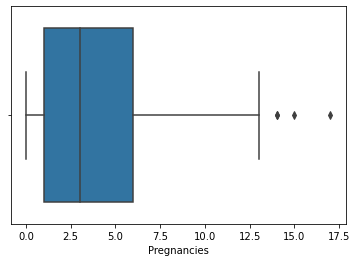

In [8]:
outlierz('Pregnancies')

In [17]:
iqr('Pregnancies')

(764, 9)

<AxesSubplot:xlabel='Pregnancies'>

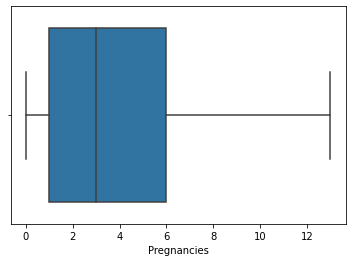

In [18]:
outlierz('Pregnancies')

<AxesSubplot:xlabel='Age'>

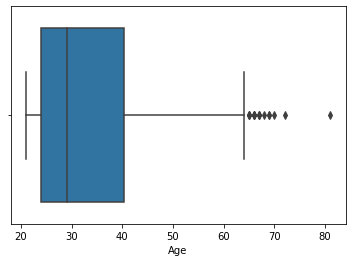

In [20]:
outlierz('Age')

In [21]:
iqr('Age')

(748, 9)

<AxesSubplot:xlabel='Age'>

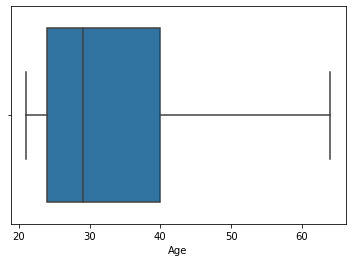

In [22]:
outlierz('Age')

<AxesSubplot:xlabel='BloodPressure'>

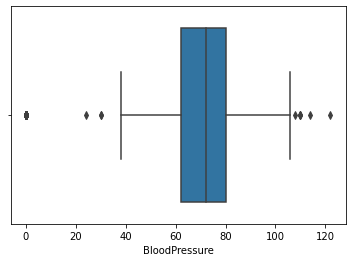

In [28]:
outlierz('BloodPressure')

In [29]:
iqr('BloodPressure')

(705, 9)

<AxesSubplot:xlabel='BloodPressure'>

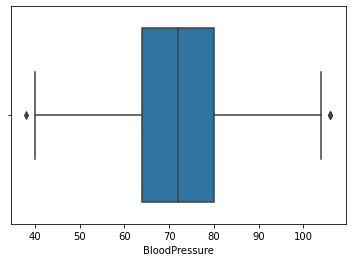

In [30]:
outlierz('BloodPressure')

# EDA

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

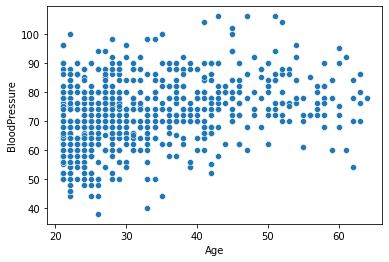

In [31]:
sns.scatterplot(data=df, y='BloodPressure', x='Age')

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

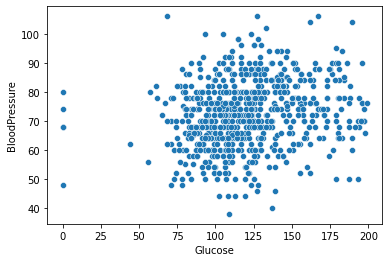

In [32]:
sns.scatterplot(data=df, y='BloodPressure', x='Glucose')

# Solution Implementation

In [33]:
# Will use Naive Bayes

X = df.loc[:, 'Pregnancies' : 'Age'].values
y = df['Outcome'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
# Model
NB = MultinomialNB().fit(X_train, y_train)

y_pred = NB.predict(X_test)

In [37]:
# Test performance
print('The accuracy is : ', metrics.accuracy_score(y_test, y_pred))

The accuracy is :  0.6028368794326241
